# 1

Установка библиотек и подсоединение диска

In [1]:
!pip install blocksnet ipykernel -q

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.8/277.8 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.1/255.1 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [2]:
import geopandas as gpd

In [3]:
pip install --upgrade pandera

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: pandera
    Found existing installation: pandera 0.20.2
    Uninstalling pandera-0.20.2:
      Successfully uninstalled pandera-0.20.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blocksnet 0.0.12 requires pandera==0.20.2, but you have pandera 0.22.0 which is incompatible.


In [4]:
import pandas as pd


In [5]:
import osmnx as ox

In [6]:
from google.colab import drive
import os

# Подключение к Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузка данных

In [12]:
boundary = ox.geocode_to_gdf('Приозерск')

<Axes: >

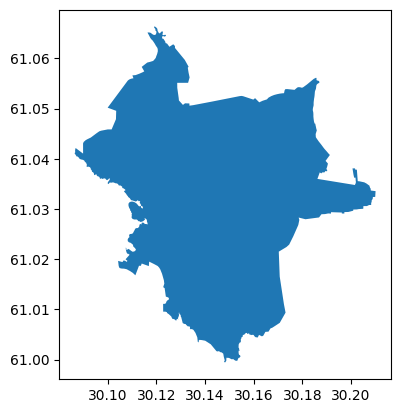

In [13]:
boundary.plot()

In [14]:
tags = {
    'roads': {
      "highway": ["construction","crossing","living_street","motorway","motorway_link","motorway_junction","pedestrian","primary","primary_link","raceway","residential","road","secondary","secondary_link","services","tertiary","tertiary_link","track","trunk","trunk_link","turning_circle","turning_loop","unclassified",],
      "service": ["living_street", "emergency_access"]
    },
    'railways': {
      "railway": "rail"
    },
    'water': {
      'riverbank':True,
      'reservoir':True,
      'basin':True,
      'dock':True,
      'canal':True,
      'pond':True,
      'natural':['water','bay'],
      'waterway':['river','canal','ditch'],
      'landuse':'basin',
      'water': 'lake'
    }
}

Чтобы оно опять о послезавтра не загружалось, после загрузки сохраняем в файлы. Если это первый запуск, то убрать #

In [15]:
# water = ox.features_from_polygon(boundary.unary_union, tags['water'])
roads = ox.features_from_polygon(boundary.unary_union, tags['roads'])

railways = ox.features_from_polygon(boundary.unary_union, tags['railways'])

In [16]:
roads = roads[roads.geometry.geom_type.isin(["LineString", "MultiLineString"])]
#water = water[water.geometry.geom_type.isin(["LineString", "MultiLineString"])]
railways = railways[railways.geometry.geom_type.isin(["LineString", "MultiLineString"])]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
roads.to_file("roads.geojson", driver='GeoJSON')

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

In [ ]:
#water.to_file("water.geojson", driver='GeoJSON')

In [18]:
railways.to_file("railways.geojson", driver='GeoJSON')

In [35]:
roads = gpd.read_file("/content/roads.geojson")
water = gpd.read_file("/content/water.geojson")
railways = gpd.read_file("/content/railways.geojson")

# 2

In [20]:
roads2 = gpd.read_file('/content/drive/MyDrive/1_gipoteza.geojson')

<Axes: >

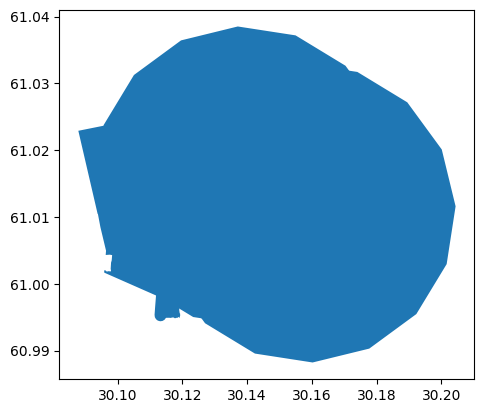

In [21]:
roads2.plot()

In [22]:
roads3 = roads2[roads2.geometry.geom_type.isin(["LineString", "MultiLineString", "LinearRing"])]

<Axes: >

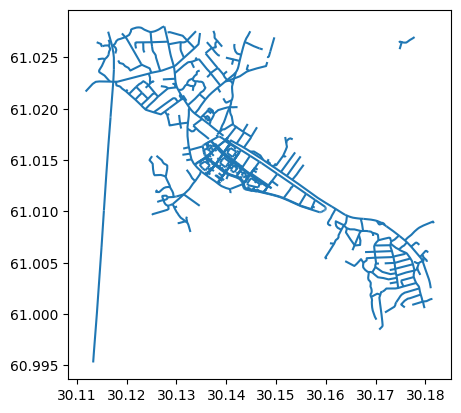

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [23]:
roads3.plot()

In [24]:
roads4 = roads3.explode(index_parts=True).reset_index(drop=True)

In [25]:
print(roads4.geom_type.unique())

['LineString']


In [26]:
roads4.to_file("roads1.geojson", driver='GeoJSON')

In [28]:
territory = gpd.read_file('/content/border.geojson')

# Убедитесь, что оба GeoDataFrame имеют одинаковую систему координат
if roads.crs != territory.crs:
    roads = roads.to_crs(territory.crs)

# Выполняем операцию difference
roads5 = gpd.overlay(roads4, territory, how='difference')


<Axes: >

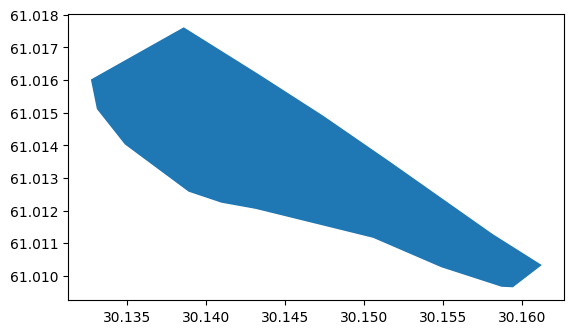

In [ ]:
territory.plot()

In [29]:
roads5 = roads4.dropna(axis=1, how='all')

In [30]:
roads6 = roads5.clip(territory)

<Axes: >

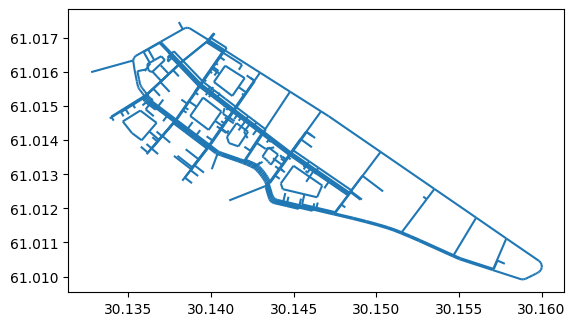

In [31]:
roads6.plot()

In [32]:
roads7 = roads6[
    (roads6['highway'].isin(['primary', 'residential', 'secondary']))
]

<Axes: >

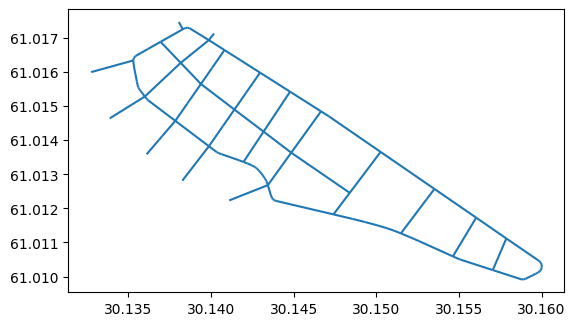

In [33]:
roads7.plot()

In [34]:
# Так как дальше модель со всеми данными не работает, то выгружаю это файлом для дальнейшей работы в QGis
roads7.to_file("roads7.geojson", driver='GeoJSON')

In [36]:
local_crs = boundary.estimate_utm_crs()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [37]:
boundaries = boundary.reset_index()[['geometry']].to_crs(local_crs)
water = water.reset_index()[['geometry']].to_crs(local_crs)
roads = roads.reset_index()[['geometry']].to_crs(local_crs)
railways = railways.reset_index()[['geometry']].to_crs(local_crs)

In [38]:
roads8 = roads7.dissolve()

In [39]:
# Так как дальше модель со всеми данными не работает, то выгружаю это файлом для дальнейшей работы в QGis
roads8.to_file("roads8.geojson", driver='GeoJSON')

In [40]:
print(f"Roads count: {len(roads8)}")

Roads count: 1


In [ ]:
#roads11.plot()

In [ ]:
#roads = roads11.explode(index_parts=True).reset_index(drop=True)

In [ ]:
#print(f"Roads count: {len(roads)}")

In [ ]:
# roads7 = roads7.reset_index()[['geometry']].to_crs(local_crs)

In [ ]:
#print(roads.crs)
#print(roads7.crs)

In [ ]:
#roads = pd.concat([roads,roads7], ignore_index=True)
# Это присоединение наших данных к оригинальным...

In [ ]:
#roads

In [ ]:
#print(roads.geom_type.unique())

In [ ]:
#print(roads7.geom_type.unique())

In [ ]:
# Функция для очистки GeoDataFrame
#def clean_geometries(gdf):
    # Удаление некорректных геометрий
 #   gdf = gdf[gdf.geometry.is_valid]

    # Удаление пустых геометрий
  #  gdf = gdf[~gdf.geometry.is_empty]

    # Удаление NaN значений
   # gdf = gdf[gdf.geometry.notna()]

    #return gdf

# Применение очистки к данным
#boundaries = clean_geometries(boundaries)
#water = clean_geometries(water)
#roads = clean_geometries(roads)
#railways = clean_geometries(railways)

In [ ]:
#if boundaries.geometry.isna().any():
 #   print("Boundaries contain NaN values")
#if water.geometry.isna().any():
 #   print("Water contains NaN values")
#if roads.geometry.isna().any():
 #   print("Roads contain NaN values")
#if railways.geometry.isna().any():
 #   print("Railways contain NaN values")

In [ ]:
#print(f"Boundaries count: {len(boundaries)}")
#print(f"Water count: {len(water)}")
#print(f"Roads count: {len(roads)}")
#print(f"Railways count: {len(railways)}")

In [ ]:
#roads.plot()

In [ ]:
#overlaps = roads.geometry.apply(lambda geom: roads.geometry.intersects(geom).sum() > 1)
#if overlaps.any():
 #   print("Некоторые геометрии пересекаются.")

In [ ]:
#import numpy as np

# Проверка на NaN
#if roads['geometry'].isnull().any():
 #   print("Есть NaN значения в геометриях")

# Проверка на Inf
#if (roads['geometry'].apply(lambda geom: geom.is_empty or geom.is_valid).any() == False):
  #  print("Есть некорректные геометрии")


In [ ]:
#roads.to_file("roadsw.geojson", driver='GeoJSON')

In [ ]:
#roads = gpd.read_file("/content/roadswr.geojson")

In [ ]:
#roads['geometry'] = roads['geometry'].buffer(0)

In [ ]:
#invalid_geometries = roads[~roads.geometry.is_valid]
#print(invalid_geometries)

In [ ]:
#roads = roads[~roads.geometry.is_empty]

In [ ]:
#empty_geometries = roads[roads.geometry.is_empty]
#print(empty_geometries)

In [ ]:
# print(roads.dtypes)

In [ ]:
# roads = roads.reset_index()[['geometry']].to_crs(local_crs)

In [ ]:
# roads.to_file("roads1.geojson", driver='GeoJSON')

In [41]:
from blocksnet import BlocksGenerator

bg = BlocksGenerator(boundaries, roads, railways, water)

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

2024-12-24 12:13:36.461 | INFO     | blocksnet.preprocessing.blocks_generator:__init__:99 - Check boundaries schema
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._

In [42]:
blocks = bg.run()

2024-12-24 12:13:48.540 | INFO     | blocksnet.preprocessing.blocks_generator:run:161 - Generating blocks
2024-12-24 12:13:48.568 | INFO     | blocksnet.preprocessing.blocks_generator:run:170 - Setting up enclosures
2024-12-24 12:13:49.741 | INFO     | blocksnet.preprocessing.blocks_generator:run:174 - Filling holes
2024-12-24 12:13:49.776 | INFO     | blocksnet.preprocessing.blocks_generator:run:178 - Dropping overlapping blocks
2024-12-24 12:13:49.845 | INFO     | blocksnet.preprocessing.blocks_generator:run:192 - Calculating blocks area
2024-12-24 12:13:49.856 | INFO     | blocksnet.preprocessing.blocks_generator:run:199 - Blocks generated


С помощью библиотеки mapclassify мы можем выводить геометрии на карту через `.explore()`.

In [43]:
!pip install mapclassify -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.5 MB/s eta 0:00:00


In [44]:
blocks.to_file("blocks.geojson", driver='GeoJSON')

In [45]:
print(blocks.geom_type.unique())

['Polygon']


In [46]:
blocks

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


,geometry
0,"POLYGON ((346307.484 6771042.220, 346270.260 6..."
1,"POLYGON ((346073.443 6770898.652, 346259.780 6..."
2,"POLYGON ((346073.443 6770898.652, 346024.616 6..."
3,"POLYGON ((345896.310 6770788.058, 345938.014 6..."
4,"POLYGON ((345896.310 6770788.058, 345887.934 6..."
...,...
242,"POLYGON ((343625.747 6770130.054, 343573.762 6..."
243,"POLYGON ((343573.762 6770163.437, 343529.946 6..."
244,"POLYGON ((343529.946 6770192.054, 343494.932 6..."
245,"POLYGON ((343409.830 6770318.092, 343270.800 6..."


In [47]:
blocks.explore()

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen impo

In [48]:
buildings = ox.features_from_polygon(boundaries.to_crs(4326).unary_union, {'building': True})

In [49]:
buildings

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amenity brand contact:phone contact:website  \
element_type osmid                                                    
node         6398486913     NaN   NaN           NaN             NaN   
             6415977015     NaN   NaN           NaN             NaN   
             6415977821     NaN   NaN           NaN             NaN   
             6415978048     NaN   NaN           NaN             NaN   
             6415978050     NaN   NaN           NaN             NaN   
...                         ...   ...           ...             ...   
relation     17702428       NaN   NaN           NaN             NaN   
             17702431       NaN   NaN           NaN             NaN   
             17952163       NaN   NaN           NaN             NaN   
             17952168       NaN   NaN           NaN             NaN   
             18431277       NaN   NaN           NaN             NaN   

                                                             opening_hours  \
element_type osmid                                                           
node         6398486913  Mo, Fr 09:00-12:00; Tu, Th 09:00-12:00, 13:00-...   
             6415977015                                                NaN   
             6415977821                                                NaN   
             6415978048                                                NaN   
             6415978050                                                NaN   
...                                                                    ...   
relation     17702428                                                  NaN   
             17702431                                                  NaN   
             17952163                                                  NaN   
             17952168                                                  NaN   
             18431277                                                  NaN   

                        operator  \
element_type osmid                 
node         6398486913      NaN   
             6415977015      NaN   
             6415977821      NaN   
             6415978048      NaN   
             6415978050      NaN   
...                          ...   
relation     17702428        NaN   
             17702431        NaN   
             17952163        NaN   
             17952168        NaN   
             18431277        NaN   

                                                                  geometry  \
element_type osmid                                                           
node         6398486913                          POINT (30.11746 61.03869)   
             6415977015                          POINT (30.11986 61.04176)   
             6415977821                          POINT (30.11814 61.04172)   
             6415978048                          POINT (30.11728 61.04159)   
             6415978050                          POINT (30.11680 61.04155)   
...                                                                    ...   
relation     17702428    POLYGON ((30.13727 61.04159, 30.13712 61.04182...   
             17702431    POLYGON ((30.13994 61.04238, 30.13992 61.04241...   
             17952163    POLYGON ((30.11237 61.03798, 30.11231 61.03797...   
             17952168    POLYGON ((30.10203 61.03626, 30.10186 61.03632...   
             18431277    POLYGON ((30.11498 61.05219, 30.11493 61.05225...   

                         ref  name shop  ... name:fi location  \
element_type osmid                       ...                    
node         6398486913  NaN  ЕИРЦ  NaN  ...     NaN      NaN   
             6415977015  NaN   NaN  NaN  ...     NaN      NaN   
             6415977821  NaN   NaN  NaN  ...     NaN      NaN   
             6415978048  NaN   NaN  NaN  ...     NaN      NaN   
             6415978050  NaN   NaN  NaN  ...     NaN      NaN   
...                      ...   ...  ...  ...     ...      ...   
relation     17702428    NaN   NaN  NaN  ...     NaN      NaN   
             177

In [50]:
# buildings = buildings.to_crs(local_crs).reset_index()[['geometry']]
buildings.geometry = buildings.representative_point()

In [51]:
print("Индекс blocks:")
print(blocks.index)

print("Индекс buildings:")
print(buildings.index)

Индекс blocks:
RangeIndex(start=0, stop=247, step=1)
Индекс buildings:
MultiIndex([(    'node', 6398486913),
            (    'node', 6415977015),
            (    'node', 6415977821),
            (    'node', 6415978048),
            (    'node', 6415978050),
            (    'node', 6415978340),
            (    'node', 6415980893),
            (     'way',   39863011),
            (     'way',   58124707),
            (     'way',   89219718),
            ...
            ('relation',   17299709),
            ('relation',   17299713),
            ('relation',   17563052),
            ('relation',   17563056),
            ('relation',   17563059),
            ('relation',   17702428),
            ('relation',   17702431),
            ('relation',   17952163),
            ('relation',   17952168),
            ('relation',   18431277)],
           names=['element_type', 'osmid'], length=3002)


In [55]:
blocks = blocks.reset_index(drop=True)
buildings = buildings.reset_index(drop=True)
print("Уникальность индексов в blocks:", blocks.index.is_unique)
print("Уникальность индексов в buildings:", buildings.index.is_unique)

Уникальность индексов в blocks: True
Уникальность индексов в buildings: True


In [58]:
if blocks.crs != buildings.crs:
    print("CRS не совпадают. Приведение buildings к CRS blocks...")
    buildings = buildings.to_crs(blocks.crs)
print("Первые строки blocks:")
print(blocks.head())

print("Первые строки buildings:")
print(buildings.head())

Первые строки blocks:
                                            geometry
0  POLYGON ((346307.484 6771042.220, 346270.260 6...
1  POLYGON ((346073.443 6770898.652, 346259.780 6...
2  POLYGON ((346073.443 6770898.652, 346024.616 6...
3  POLYGON ((345896.310 6770788.058, 345938.014 6...
4  POLYGON ((345896.310 6770788.058, 345887.934 6...
Первые строки buildings:
  amenity brand contact:phone contact:website  \
0     NaN   NaN           NaN             NaN   
1     NaN   NaN           NaN             NaN   
2     NaN   NaN           NaN             NaN   
3     NaN   NaN           NaN             NaN   
4     NaN   NaN           NaN             NaN   

                                       opening_hours operator  \
0  Mo, Fr 09:00-12:00; Tu, Th 09:00-12:00, 13:00-...      NaN   
1                                                NaN      NaN   
2                                                NaN      NaN   
3                                                NaN      NaN   
4              

In [59]:
from blocksnet import BlocksSplitter

bsp = BlocksSplitter(blocks, buildings)

In [60]:
local_crs = boundaries.estimate_utm_crs()

In [61]:
blocks = blocks.to_crs(local_crs)
buildings = buildings.to_crs(local_crs)

In [62]:
if buildings.geometry.isnull().any():
    print("Есть пустые значения в геометрии.")
    buildings = blocks[blocks.geometry.notnull()]  # Удаляем пустые значения

In [64]:
splitted_blocks = bsp.run()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2024-12-24 12:20:50.577 | INFO     | blocksnet.preprocessing.blocks_splitter:run:167 - Joining buildings and blocks to exclude duplicates
2024-12-24 12:20:50.657 | INFO     | blocksnet.preprocessing.blocks_splitter:run:176 - Choosing blocks to be splitted
2024-12-24 12:20:50.699 | INFO     | blocksnet.preprocessing.blocks_splitter:run:185 - Splitting filtered blocks
  0%|          | 0/3 [00:00<?, ?it/s]Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7e545205f6d0>
Traceback (most recent call last):
  File "/usr/local/lib/python3

In [65]:
len(blocks), len(splitted_blocks)

(247, 258)

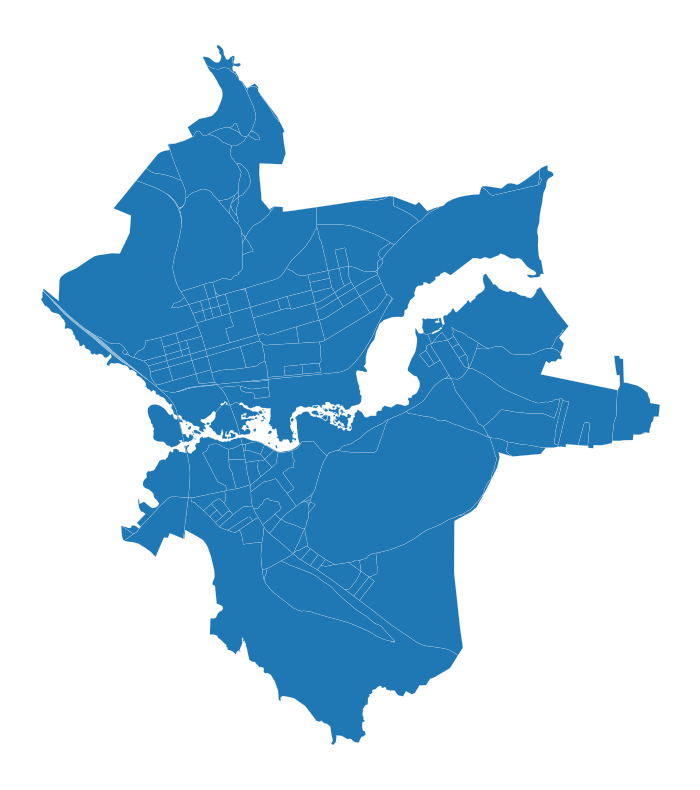

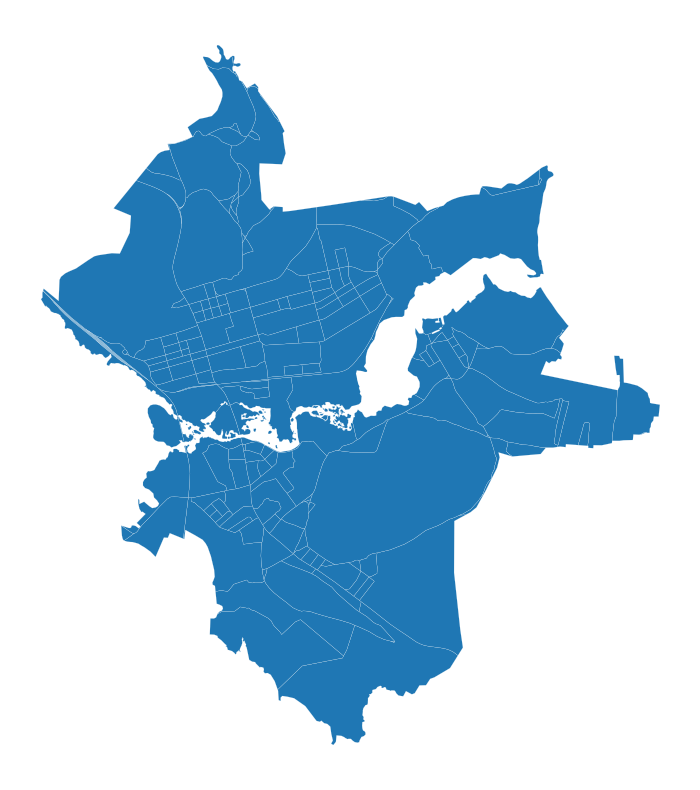

In [66]:
blocks.plot(linewidth=0.1, figsize=(10,10)).set_axis_off()
splitted_blocks.plot(linewidth=0.1, figsize=(10,10)).set_axis_off()

In [67]:
splitted_blocks.to_file('blocks.geojson')